In [10]:
import sys
print(sys.version)
import tensorflow as tf
import numpy as np
from mnist import MNIST
from matplotlib import pyplot as plt

3.8.6 (v3.8.6:db455296be, Sep 23 2020, 13:31:39) 
[Clang 6.0 (clang-600.0.57)]


In [36]:
def LeNet5_model():
    model = tf.keras.models.Sequential() 
    model.add(tf.keras.layers.Conv2D(8, 5, input_shape=(28, 28, 1), padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))  
    model.add(tf.keras.layers.Conv2D(16, 3, activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))  
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(120, activation='relu'))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))# енто совт-арг-макс а не совт-макс, кажется
    return model

In [33]:
def CPCP_model():
    model = tf.keras.models.Sequential() 
    model.add(tf.keras.layers.Conv2D(32, 3, input_shape=(28, 28, 1), activation='relu'))  
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(tf.keras.layers.Conv2D(64, 3, activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(tf.keras.layers.Conv2D(128, 3, activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))# енто совт-арг-макс а не совт-макс, кажется
    return model

In [50]:
def vgg_model(dropout=0.2):
    model = tf.keras.models.Sequential() 
    model.add(tf.keras.layers.Conv2D(16, 3, input_shape=(28, 28, 1), padding='same', activation='relu'))  
    model.add(tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'))  
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.Conv2D(32, 3, activation='relu'))
    model.add(tf.keras.layers.Conv2D(32, 3, activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(512, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))# енто совт-арг-макс а не совт-макс, кажется
    return model

In [70]:
def read_data(path):
    mnist_data = MNIST(path)
    mnist_train_images, mnist_train_labels = mnist_data.load_training()
    mnist_test_images, mnist_test_labels = mnist_data.load_testing()
    x_train = np.array(mnist_train_images)
    y_train = np.array(mnist_train_labels)
    x_test = np.array(mnist_test_images)
    y_test = np.array(mnist_test_labels)
    x_train, x_test = x_train / 255.0, x_test / 255.0
    x_train = tf.reshape(x_train, [60000, 28, 28, 1])
    x_test = tf.reshape(x_test, [10000, 28, 28, 1])
    return x_train, y_train, x_test, y_test

In [23]:
# preapare data
x_train, y_train, x_test, y_test = read_data('./data/mnist')

In [73]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
acc = []

In [74]:
# Lenet5
model = LeNet5_model()
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, verbose=1)
error, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("LeNet5", error, accuracy)
acc.append(accuracy)

Epoch 1/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.7110 - accuracy: 0.7378
Epoch 2/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3570 - accuracy: 0.8701
Epoch 3/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.3002 - accuracy: 0.8900
Epoch 4/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2673 - accuracy: 0.9004
Epoch 5/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2409 - accuracy: 0.9099
LeNet5 0.30308395624160767 0.8937000036239624


In [75]:
model = CPCP_model()
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, verbose=1)
error, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("CPCP", error, accuracy)
acc.append(accuracy)

Epoch 1/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.7890 - accuracy: 0.7164
Epoch 2/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.4012 - accuracy: 0.8521
Epoch 3/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.3335 - accuracy: 0.8782
Epoch 4/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.2958 - accuracy: 0.8898
Epoch 5/5
1875/1875 [==============================] - 42s 23ms/step - loss: 0.2715 - accuracy: 0.8991
CPCP 0.33622556924819946 0.8733999729156494


In [76]:
model = vgg_model(0)
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, verbose=1)
error, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("vgg", error, accuracy)
acc.append(accuracy)

Epoch 1/5
1875/1875 [==============================] - 78s 41ms/step - loss: 0.6010 - accuracy: 0.7794
Epoch 2/5
1875/1875 [==============================] - 92s 49ms/step - loss: 0.2785 - accuracy: 0.8981
Epoch 3/5
1875/1875 [==============================] - 89s 47ms/step - loss: 0.2254 - accuracy: 0.9166
Epoch 4/5
1875/1875 [==============================] - 88s 47ms/step - loss: 0.1941 - accuracy: 0.9270
Epoch 5/5
1875/1875 [==============================] - 95s 51ms/step - loss: 0.1584 - accuracy: 0.9402
vgg 0.2436552494764328 0.911899983882904


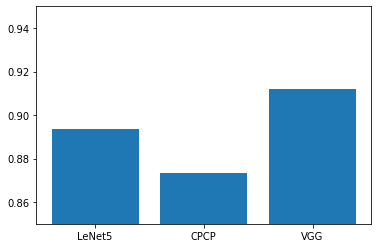

In [80]:
x = ['LeNet5', 'CPCP', 'VGG']
plt.bar(x, acc)
plt.ylim([0.85,0.95])
plt.show()

In [82]:
acc = []
ds = []
for d in range(0, 6):
    dropout = 0.1 * d
    ds.append(dropout)
    model = vgg_model(dropout)
    model.compile(optimizer='adam',
                  loss=loss_fn,
                  metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=5, verbose=0)
    error, accuracy = model.evaluate(x_test, y_test, verbose=0)
    acc.append(accuracy)
    print("vgg", dropout, error, accuracy)


Epoch 1/5
1875/1875 [==============================] - 85s 45ms/step - loss: 0.5850 - accuracy: 0.7875
Epoch 2/5
1875/1875 [==============================] - 74s 39ms/step - loss: 0.2701 - accuracy: 0.8989
Epoch 3/5
1875/1875 [==============================] - 76s 40ms/step - loss: 0.2207 - accuracy: 0.9196
Epoch 4/5
1875/1875 [==============================] - 71s 38ms/step - loss: 0.1822 - accuracy: 0.9312
Epoch 5/5
1875/1875 [==============================] - 72s 39ms/step - loss: 0.1558 - accuracy: 0.9413
vgg 0.0 0.22581100463867188 0.9204999804496765
Epoch 1/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.6247 - accuracy: 0.7737
Epoch 2/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.2945 - accuracy: 0.8914
Epoch 3/5
1875/1875 [==============================] - 1113s 594ms/step - loss: 0.2390 - accuracy: 0.9128
Epoch 4/5
1875/1875 [==============================] - 87s 46ms/step - loss: 0.2127 - accuracy: 0.9204
Epoch 5/5
1875/1875 [==

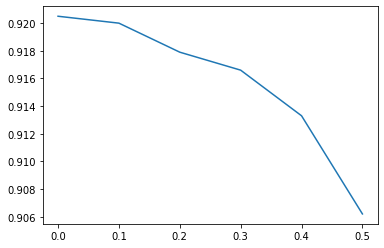

In [83]:
plt.plot(ds, acc)
plt.show()

In [91]:
# VGG the best
model = vgg_model(0.0)
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, verbose=1)
error, accuracy = model.evaluate(x_test, y_test, verbose=0)

print(accuracy, error)
k = 10
predicted = model.predict(x_test)
result = [0] * len(predicted) # result class
sim = np.zeros((k, k)) 
maxr = np.ones((k, k)) * -1
for j in range(len(predicted)):
    res = predicted[j] # 10
    for i in range(len(res)):
        if res[i] > res[result[j]]:
            result[j] = i
        if maxr[y_test[j], i] < res[i]:
            maxr[y_test[j], i] = res[i]
            sim[y_test[j], i] = j

Epoch 1/5
1875/1875 [==============================] - 105s 56ms/step - loss: 0.5992 - accuracy: 0.7800
Epoch 2/5
1875/1875 [==============================] - 133s 71ms/step - loss: 0.2807 - accuracy: 0.8969
Epoch 3/5
1875/1875 [==============================] - 131s 70ms/step - loss: 0.2274 - accuracy: 0.9166
Epoch 4/5
1875/1875 [==============================] - 135s 72ms/step - loss: 0.1935 - accuracy: 0.9288
Epoch 5/5
1875/1875 [==============================] - 106s 57ms/step - loss: 0.1687 - accuracy: 0.9359
0.9171000123023987 0.23404531180858612


In [92]:
cm = tf.math.confusion_matrix(y_test, result)
np.set_printoptions(suppress=True)
print("CM\n",cm)
print(sim)

CM
 tf.Tensor(
[[846   0  12  13   5   0 108   0  16   0]
 [  0 986   0   8   1   0   4   0   1   0]
 [ 11   0 873   7  60   0  43   0   6   0]
 [  5   5   6 923  36   0  22   0   3   0]
 [  0   0  41  18 910   0  29   0   2   0]
 [  0   0   0   0   0 981   0   7   1  11]
 [ 77   1  39  23 107   0 738   0  15   0]
 [  0   0   0   0   0   9   0 935   1  55]
 [  1   1   1   2   3   1   1   0 990   0]
 [  0   0   0   0   1   3   0   7   0 989]], shape=(10, 10), dtype=int32)
[[ 489. 7445. 2953. 3531. 8324. 3466.  381. 5966. 2599. 3342.]
 [8757.    2. 7533.  787. 5597. 6331. 8757. 6331. 8156. 6331.]
 [4159. 3880. 7371. 3457. 7976. 3082. 3240. 2382. 7073. 3082.]
 [ 979. 5012. 2318. 2253. 2898. 6433. 1336. 3265. 6676. 3265.]
 [1462. 6500. 5255. 4922. 9638. 5511. 2919. 1142.  702. 1142.]
 [7798.   11. 7279. 5561. 7133.   82. 5561. 8292. 7798. 6061.]
 [5806. 9991. 2985. 5006. 3338. 5990. 1698. 9306. 3741. 4420.]
 [3256. 8278. 8278. 3256. 8278. 6472. 8278.  757.   12. 2914.]
 [1846. 2905.  635. 

In [ ]:
# test on fashion_mnist
x_train, y_train, x_test, y_test = read_data('./data/fashion-mnist')
model = vgg_model(0.0)
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, verbose=1)
error, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("vgg", error, accuracy)

Epoch 1/5
 552/1875 [=======>......................] - ETA: 58s - loss: 0.8581 - accuracy: 0.6863